In [240]:
import pandas
import numpy
import os
import pybedtools
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/arushiv/toolScripts')
from esiScoreAfterMean import calculate_ESI

In [241]:
d = pandas.read_csv("intermediateFiles/calculate_avg_posterior/avgPostriors.dat", sep='\t')
d.head()
#d[(d['cell'] == "GM12878") & (d['annotation'] == "hotRegions")]

,chrom,start,end,cell,annotation,avg_posterior,infoContent
0,chr1,3564262,3578038,GM12878,broadDomains,0.213090,1.887590
1,chr1,6083568,6094425,GM12878,broadDomains,0.523513,2.568175
2,chr1,6842403,6852404,GM12878,broadDomains,0.348671,3.639130
3,chr1,8476074,8485400,GM12878,broadDomains,0.269500,5.003266
4,chr1,8927380,8940954,GM12878,broadDomains,0.414123,4.852667


In [251]:
def makePlot(a, x, y, outfile, xtitle, ytitle):
    sns.set_style("white")
    ge = sns.FacetGrid(a, col="annotation", row="cell", margin_titles=True, hue="annotation", palette="Set1")
    (ge.map(sns.kdeplot, x, y, shade=True)
     .set(xlim=(0, max(a[x])), ylim=(0, max(a[y])))
     .set_titles("{col_name}")
     .set_xlabels(xtitle)
     .set_ylabels(ytitle)
     .fig.subplots_adjust(wspace=.05, hspace=.05)
     )
#     g.axes.set_xlabel(xtitle)
#     g.axes.set_ylabel(ytitle)
    plt.savefig(outfile)  

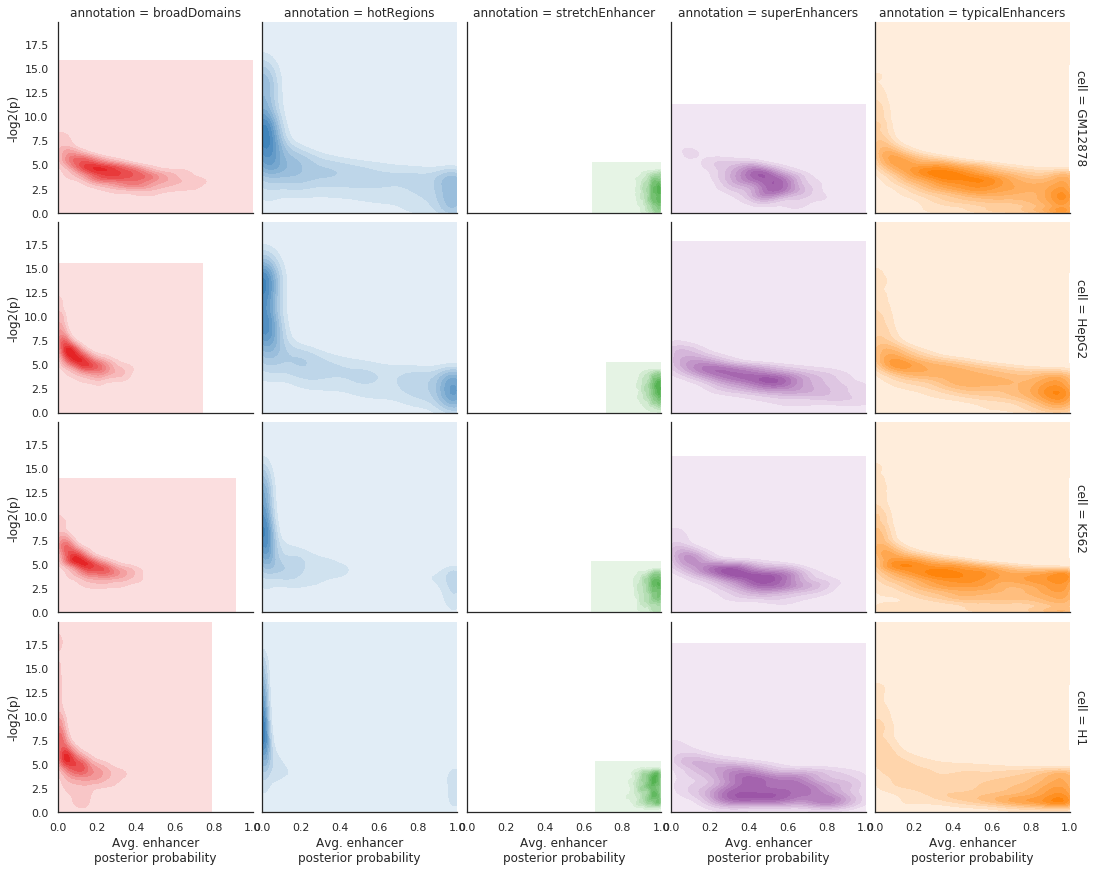

In [253]:
makePlot(d, "avg_posterior", "infoContent", "fig.infoContent.pdf", "Avg. enhancer\nposterior probability", "-log2(p)")  

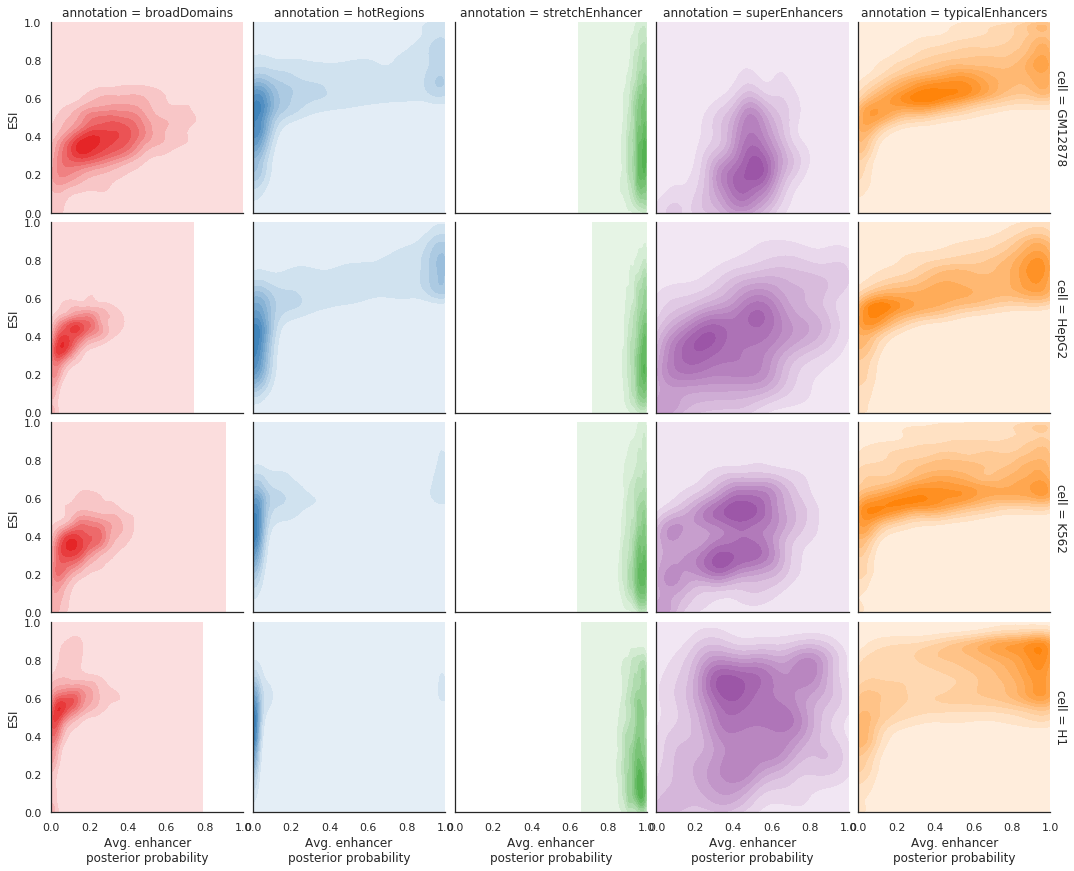

In [255]:
d_esi = pandas.read_csv("intermediateFiles/calculate_avg_posterior/ESI_full.dat", sep='\t')
makePlot(d_esi, "avg_post", "ESI", "fig.ESI.pdf", "Avg. enhancer\nposterior probability", "ESI")  

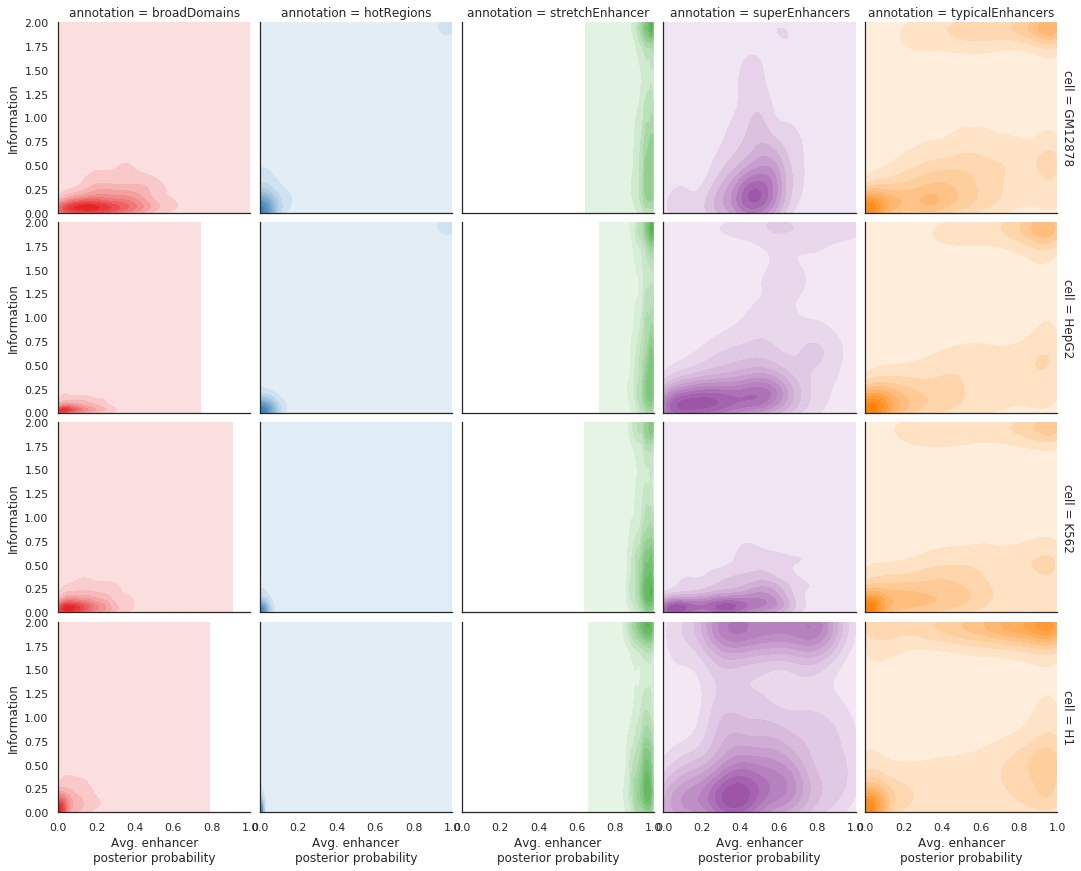

In [256]:
d_information = pandas.read_csv("intermediateFiles/calculate_avg_posterior/subset4_information_full.dat", sep='\t')
makePlot(d_information, "avg_post", "information", "fig.info.pdf", "Avg. enhancer\nposterior probability", "Information")

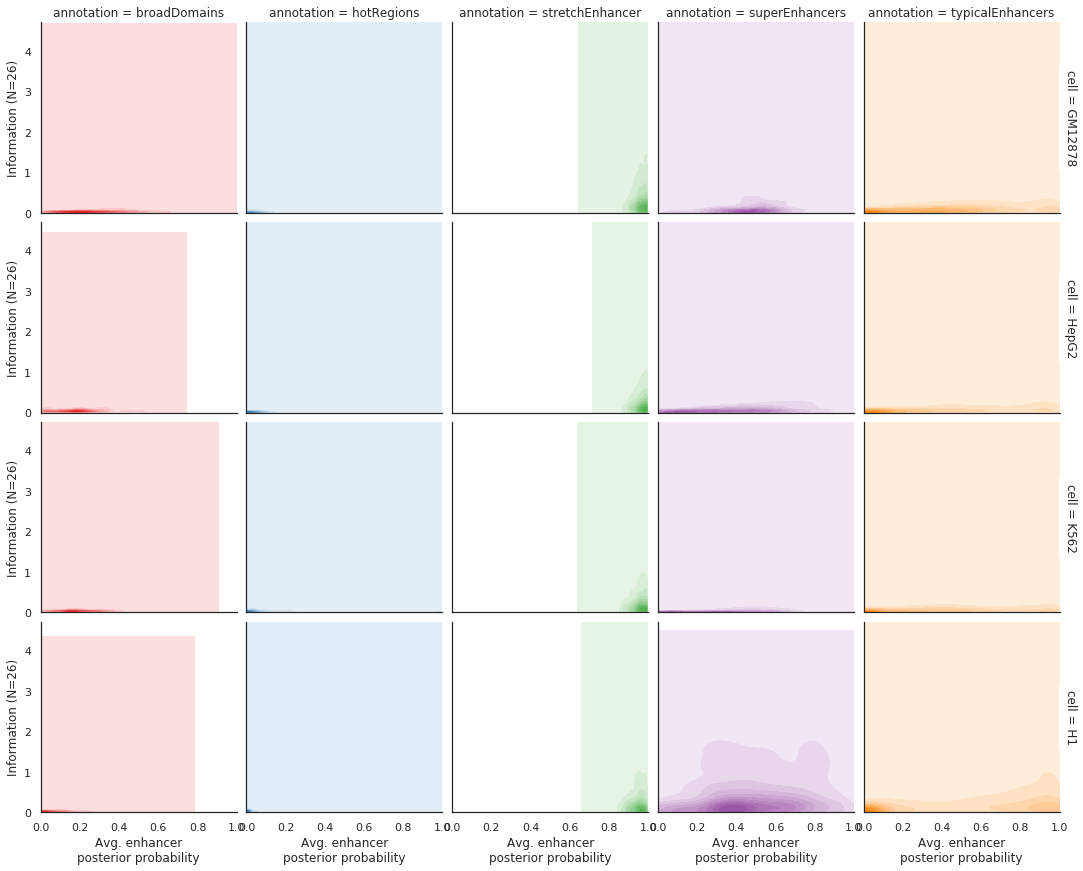

In [257]:
d_information_nosub = pandas.read_csv("intermediateFiles/calculate_avg_posterior/noSubset_information_full.dat", sep='\t')
makePlot(d_information_nosub, "avg_post", "information", "fig.info.pdf", "Avg. enhancer\nposterior probability", "Information (N=26)")

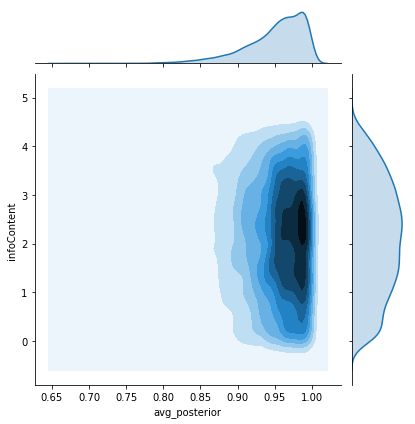

In [91]:
sns.jointplot(data = d, x="avg_posterior", y="infoContent", kind="kde")

In [153]:
def calc(filename, cell):
    t = pandas.read_csv(filename, sep='\t')
    t.loc[:,'avg_post'] = t['avg_posterior']
    t.set_index(['chrom', 'start', 'end', 'infoContent', 'cell', 'annotation', 'avg_post'], inplace=True)
    t.rename(columns={'avg_posterior':cell}, inplace=True)
    #print(t.head())
    out = calculate_ESI(t)
    out.reset_index(inplace=True)
    #print(out[['avg_post','GM12878']].head())
    return out

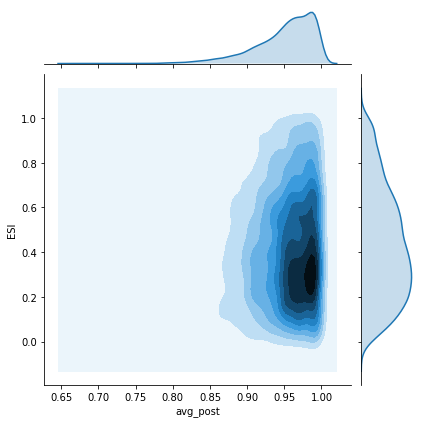

In [163]:
sns.jointplot(data = full[full['annotation']=="stretchEnhancer"], x="avg_post", y="ESI", kind="kde")

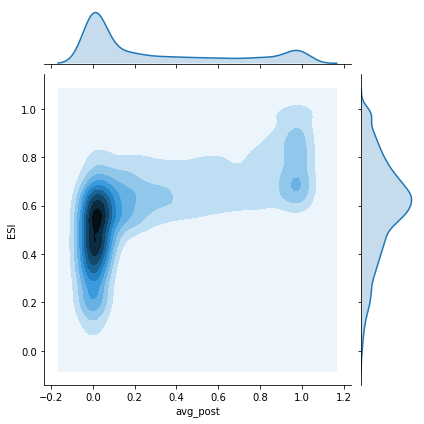

In [164]:
sns.jointplot(data = full[full['annotation']=="hotRegions"], x="avg_post", y="ESI", kind="kde")

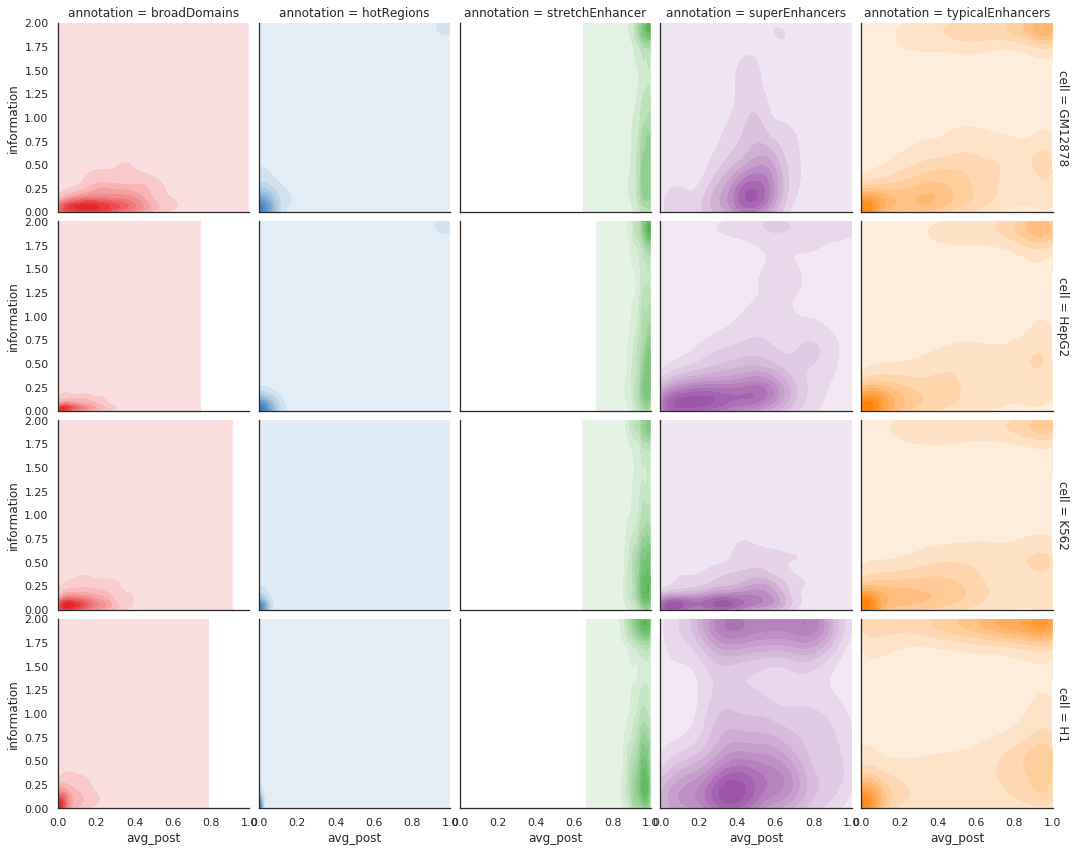

In [233]:
a = pandas.read_csv("intermediateFiles/calculate_avg_posterior/subset4_information_full.dat", sep='\t')
sns.set_style("white")
ge = sns.FacetGrid(a, col="annotation", row="cell", margin_titles=True, hue="annotation", palette="Set1")
ge.map(sns.kdeplot, "avg_post", "information", shade=True).set(xlim=(0, 1.0), ylim=(0, 2)).set_titles("{col_name}").fig.subplots_adjust(wspace=.05, hspace=.05)